# CATARACT EYE DISEASES USING CNN, VGG16 AND RESTNET50


# MATURE CATARACT

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import seaborn as sns
from tensorflow.keras.applications import VGG16
import plotly.express as px
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots


LOADED ALL THE RECIEVED LIBRARIES 

In [2]:
# fetching dataset
dataset_path = "cataract"

LOADED DATASET

In [3]:
# Getting the list of class directories
class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

In [4]:
# Print the class names and the number of images in each class
for class_dir in class_dirs:
    class_path = os.path.join(dataset_path, class_dir)
    num_images = len(os.listdir(class_path))
    print(f"Class '{class_dir}' has {num_images} images.")
    

Class 'cataract' has 385 images.
Class 'normal' has 439 images.


GETTING LIST OF CLASS AND NUMBER OF IMAGE IN THE CLASS

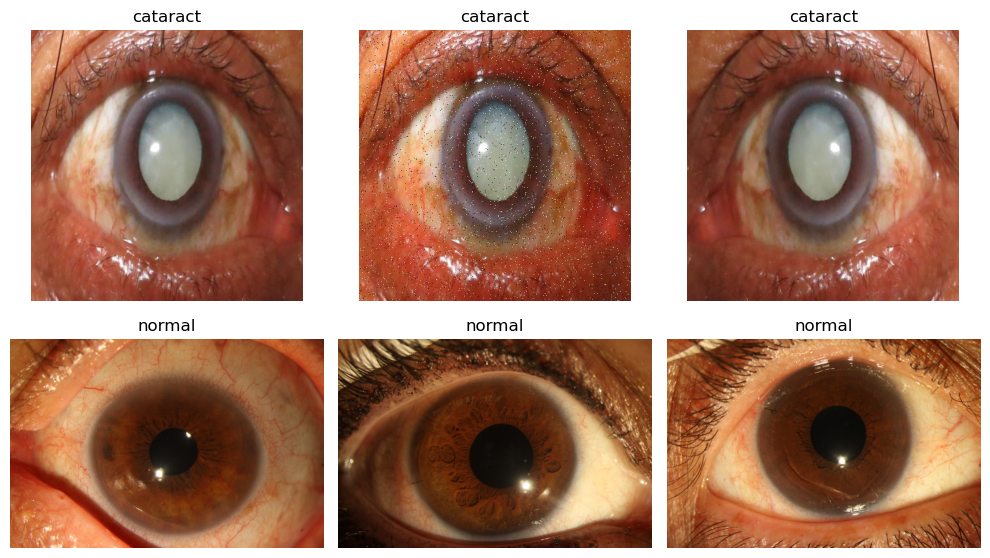

In [5]:
# Display some sample images from each class
fig, axes = plt.subplots(nrows=len(class_dirs), ncols=3, figsize=(10, len(class_dirs) * 3))
for i, class_dir in enumerate(class_dirs):
    class_path = os.path.join(dataset_path, class_dir)
    sample_images = os.listdir(class_path)[:3]
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(class_dir)

plt.tight_layout()
plt.show()

3 SAMPLE IMAGE OF EACH CLASS 

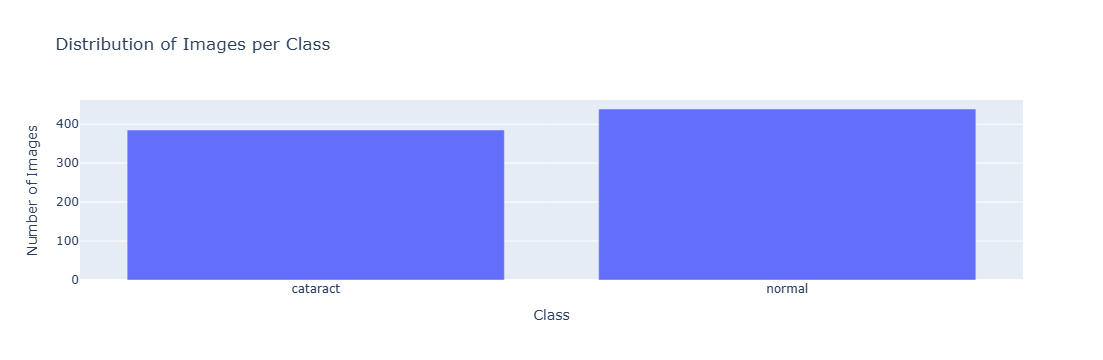

In [6]:
# Distribution of images per class
class_counts = [len(os.listdir(os.path.join(dataset_path, class_dir))) for class_dir in class_dirs]
fig = px.bar(x=class_dirs, y=class_counts, labels={'x': 'Class', 'y': 'Number of Images'}, title='Distribution of Images per Class')
fig.show()


GRAPHICS OF IMAGE IN EACH CLASS

# DATA PRE-PROCESSING 

In [7]:
# mentioning the image size and batch size
img_height, img_width = 100, 100
batch_size = 10

SETTING IMAGE HEIGHT AND WIDTH FOR PROCESSING AND BATCH distribution of image 

In [8]:
# the data generators for training and validation = 80:20
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25,  # Split the data into training and validation
    
)

In [9]:
# training data = 75%
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

Found 619 images belonging to 2 classes.


In [10]:
# validation data = 25%
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  
    
)

Found 205 images belonging to 2 classes.


In [11]:
# # # Define the data generators for training and validation - data augmentation 
# # datagen = ImageDataGenerator(
# #     rescale=1./255,
#     rotation_range=45,     # Randomly rotate images by up to 45 degrees
#     zoom_range=0.15,        # Randomly zoom in/out on images by up to 15%
#     vertical_flip=True,    # Randomly flip images vertically
# # )

# CNN

In [12]:

# fitting the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_dirs), activation='softmax')
])


# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [13]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,487,106 (9.49 MB)

 Trainable params: 2,487,106 (9.49 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(
    train_generator,
    epochs=104,
    validation_data=validation_generator
)

Epoch 1/104


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.5628 - loss: 0.7486 - val_accuracy: 0.9707 - val_loss: 0.4031
Epoch 2/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8378 - loss: 0.4141 - val_accuracy: 0.6585 - val_loss: 0.6528
Epoch 3/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9075 - loss: 0.2525 - val_accuracy: 0.9415 - val_loss: 0.2761
Epoch 4/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9392 - loss: 0.1836 - val_accuracy: 0.9561 - val_loss: 0.1930
Epoch 5/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9173 - loss: 0.2131 - val_accuracy: 0.9854 - val_loss: 0.0971
Epoch 6/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.9259 - loss: 0.2256 - val_accuracy: 0.9707 - val_loss: 0.2019
Epoch 7/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.9192 - loss: 0.1747 - val_accuracy: 0.9415 - val_loss: 0.1719
Epoch 8/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9206 - loss: 0.1876 - val_accuracy: 0.902

62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.9839 - loss: 0.0559 - val_accuracy: 0.9854 - val_loss: 0.2075
Epoch 52/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9929 - loss: 0.0172 - val_accuracy: 0.9854 - val_loss: 0.2116
Epoch 53/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9967 - loss: 0.0241 - val_accuracy: 0.9707 - val_loss: 0.2665
Epoch 54/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.9833 - loss: 0.0380 - val_accuracy: 0.9610 - val_loss: 0.3882
Epoch 55/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - accuracy: 0.9514 - loss: 0.1595 - val_accuracy: 0.9756 - val_loss: 0.2211
Epoch 56/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.9681 - loss: 0.0847 - val_accuracy: 0.9854 - val_loss: 0.3450
Epoch 57/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.9774 - loss: 0.0686 - val_accuracy: 0.9854 - val_loss: 0.1939
Epoch 58/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9898 - loss: 0.0353 - val_accuracy:

62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.9820 - loss: 0.0783 - val_accuracy: 0.9854 - val_loss: 0.1939
Epoch 102/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.9831 - loss: 0.0330 - val_accuracy: 0.9805 - val_loss: 0.1889
Epoch 103/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9976 - loss: 0.0103 - val_accuracy: 0.9854 - val_loss: 0.1955
Epoch 104/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9854 - val_loss: 0.2139


In [15]:
    # EDA of the model
    loss, accuracy = model.evaluate(validation_generator)
    print(f" Valid Accuracy = {accuracy}")
    print(f" Valid Loss = {loss}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9774 - loss: 0.3693
 Valid Accuracy = 0.9853658676147461
 Valid Loss = 0.21389251947402954


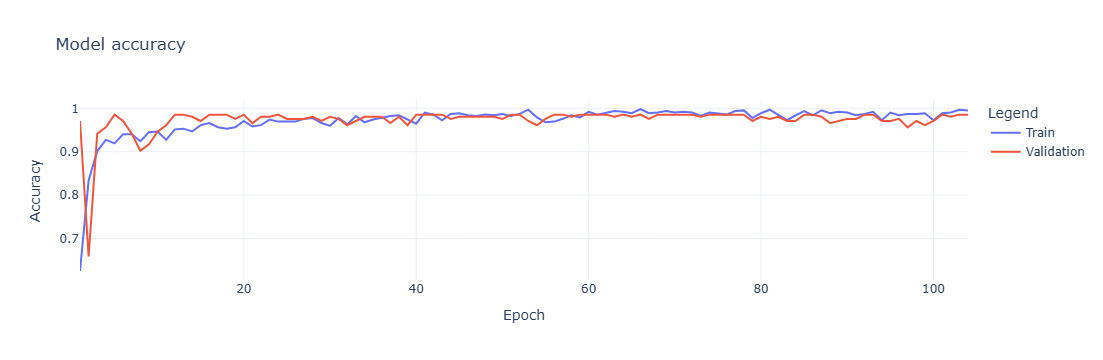

In [16]:
# Plotting model accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = list(range(1, len(accuracy) + 1))
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=accuracy, mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=epochs, y=val_accuracy, mode='lines', name='Validation'))
fig.update_layout(
    title='Model accuracy',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()


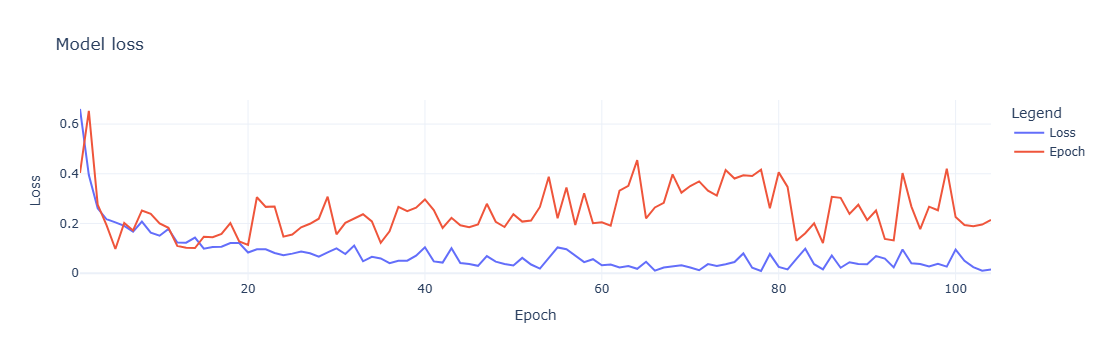

In [17]:
# Plot training & validation loss values

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(accuracy) + 1))
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=loss, mode='lines', name='Loss'))
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines', name='Epoch'))
fig.update_layout(
    title='Model loss',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()


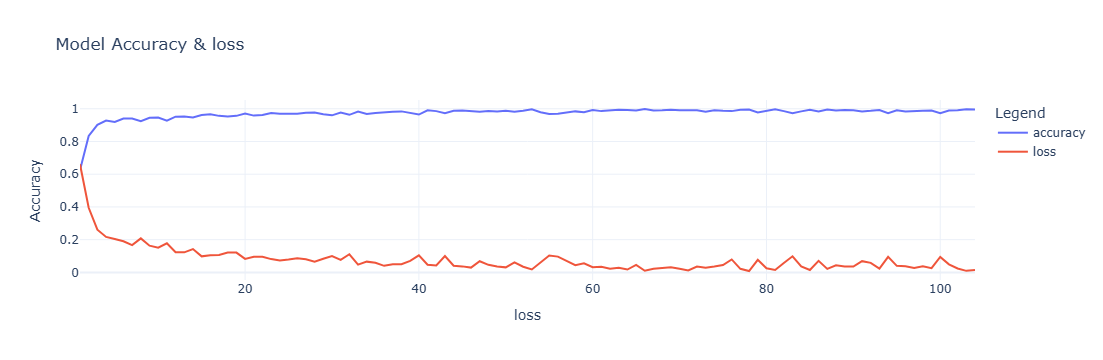

In [18]:
# Plot training & accuracy loss values


accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = list(range(1, len(accuracy) + 1))
fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=accuracy, mode='lines', name='accuracy'))
fig.add_trace(go.Scatter(x=epochs, y=loss, mode='lines', name='loss'))
fig.update_layout(
    title='Model Accuracy & loss',
    xaxis_title='loss',
    yaxis_title='Accuracy',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()


In [19]:
# Predict on validation data
predictions = model.predict(validation_generator)
predicted_class_indices = np.argmax(predictions, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


In [20]:
# True labels
true_class_indices = validation_generator.classes

In [21]:
# Class labels
class_labels = list(validation_generator.class_indices.keys())


[[48 48]
 [51 58]]


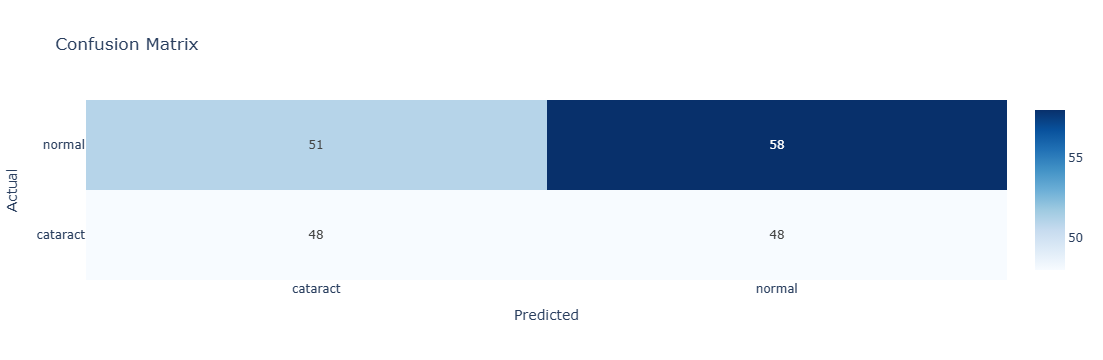

In [22]:
# Confusion matrix
cm = confusion_matrix(true_class_indices, predicted_class_indices)
print(cm)


# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=class_labels,
    y=class_labels,
    colorscale='Blues',
    text=cm,
    texttemplate="%{text}",
    hoverinfo="text"
))

# Update layout
fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted',
    yaxis_title='Actual'
)
fig.show()

In [23]:
# Classification report
report = classification_report(true_class_indices, predicted_class_indices, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

    cataract       0.48      0.50      0.49        96
      normal       0.55      0.53      0.54       109

    accuracy                           0.52       205
   macro avg       0.52      0.52      0.52       205
weighted avg       0.52      0.52      0.52       205



## VGG16

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image height and width
img_height, img_width = 100, 100

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)




Found 619 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [25]:
# Load VGG16 pre-trained model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
for layer in base_model.layers[:-4]:  # Fine-tune the top 4 layers
    layer.trainable = False

# Add custom layers on top of VGG16 base
model_vgg16 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(class_dirs), activation='softmax')
])

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_vgg16.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [26]:

# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=104,
    validation_data=validation_generator
)


Epoch 1/104


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



62/62 ━━━━━━━━━━━━━━━━━━━━ 46s 695ms/step - accuracy: 0.7677 - loss: 0.4769 - val_accuracy: 0.6195 - val_loss: 0.5744
Epoch 2/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 689ms/step - accuracy: 0.9462 - loss: 0.1513 - val_accuracy: 0.7366 - val_loss: 0.4791
Epoch 3/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 45s 704ms/step - accuracy: 0.9627 - loss: 0.1346 - val_accuracy: 0.9561 - val_loss: 0.1435
Epoch 4/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 675ms/step - accuracy: 0.9696 - loss: 0.1056 - val_accuracy: 0.9171 - val_loss: 0.1474
Epoch 5/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 674ms/step - accuracy: 0.9784 - loss: 0.1121 - val_accuracy: 0.8878 - val_loss: 0.3299
Epoch 6/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 678ms/step - accuracy: 0.9735 - loss: 0.0569 - val_accuracy: 0.9073 - val_loss: 0.2038
Epoch 7/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 671ms/step - accuracy: 0.9694 - loss: 0.0941 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 8/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 685ms/step - accuracy: 0.9768 - loss: 0.0591 - val_accuracy

Epoch 51/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 699ms/step - accuracy: 0.9964 - loss: 0.0189 - val_accuracy: 0.9366 - val_loss: 0.2045
Epoch 52/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 687ms/step - accuracy: 0.9880 - loss: 0.0283 - val_accuracy: 0.9561 - val_loss: 0.1659
Epoch 53/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 45s 708ms/step - accuracy: 0.9949 - loss: 0.0169 - val_accuracy: 0.9951 - val_loss: 0.0147
Epoch 54/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 701ms/step - accuracy: 0.9952 - loss: 0.0104 - val_accuracy: 0.9220 - val_loss: 0.3097
Epoch 55/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 696ms/step - accuracy: 0.9843 - loss: 0.0301 - val_accuracy: 1.0000 - val_loss: 6.8002e-04
Epoch 56/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 694ms/step - accuracy: 0.9911 - loss: 0.0411 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 57/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 699ms/step - accuracy: 0.9912 - loss: 0.0229 - val_accuracy: 0.9610 - val_loss: 0.1112
Epoch 58/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 696ms/step - accuracy: 0.9955 - los

62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 669ms/step - accuracy: 0.9997 - loss: 0.0034 - val_accuracy: 0.9756 - val_loss: 0.0743
Epoch 101/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 670ms/step - accuracy: 0.9961 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 102/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 673ms/step - accuracy: 0.9938 - loss: 0.0213 - val_accuracy: 0.9610 - val_loss: 0.1174
Epoch 103/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 683ms/step - accuracy: 0.9918 - loss: 0.0302 - val_accuracy: 0.9902 - val_loss: 0.0249
Epoch 104/104
62/62 ━━━━━━━━━━━━━━━━━━━━ 43s 674ms/step - accuracy: 0.9957 - loss: 0.0219 - val_accuracy: 0.9561 - val_loss: 0.1403


21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.9281 - loss: 0.1840
VGG16 Valid Accuracy = 0.9317073225975037
VGG16 Valid Loss = 0.19830714166164398


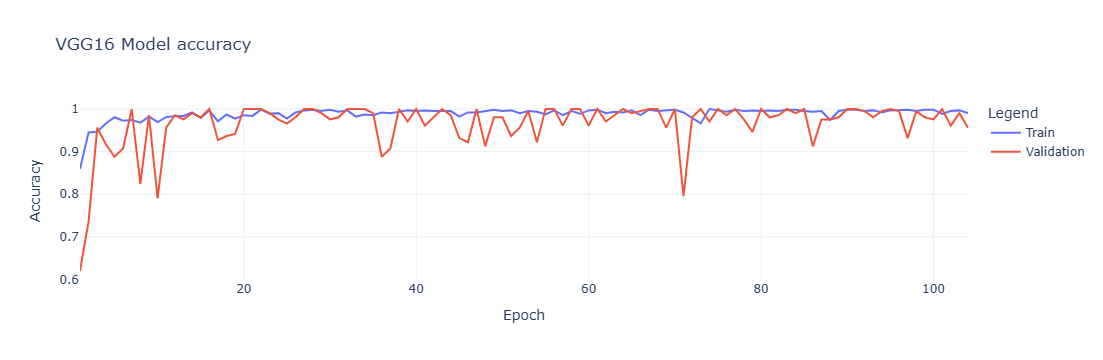

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 442ms/step
[[48 48]
 [58 51]]


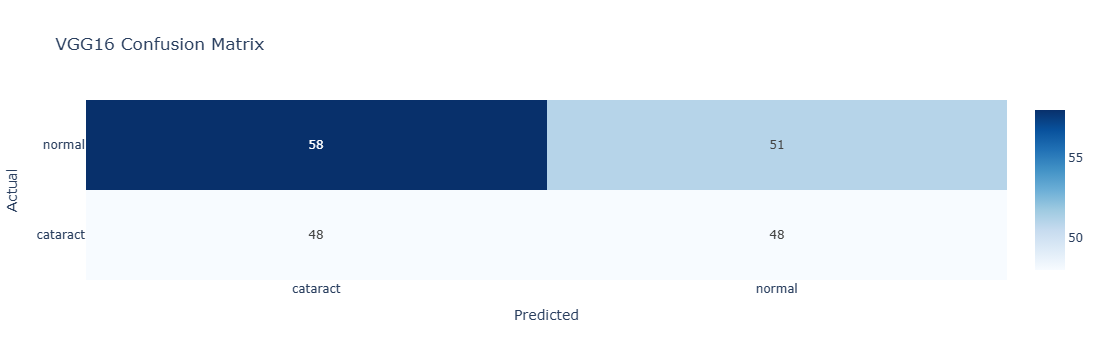

In [27]:

# Evaluate the model
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(validation_generator)
print(f"VGG16 Valid Accuracy = {accuracy_vgg16}")
print(f"VGG16 Valid Loss = {loss_vgg16}")

# Plotting model accuracy for VGG16
accuracy_vgg16 = history_vgg16.history['accuracy']
val_accuracy_vgg16 = history_vgg16.history['val_accuracy']
epochs_vgg16 = list(range(1, len(accuracy_vgg16) + 1))
fig_vgg16 = go.Figure()
fig_vgg16.add_trace(go.Scatter(x=epochs_vgg16, y=accuracy_vgg16, mode='lines', name='Train'))
fig_vgg16.add_trace(go.Scatter(x=epochs_vgg16, y=val_accuracy_vgg16, mode='lines', name='Validation'))
fig_vgg16.update_layout(
    title='VGG16 Model accuracy',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    legend_title='Legend',
    template='plotly_white'
)

fig_vgg16.show()

# Predict on validation data using VGG16
predictions_vgg16 = model_vgg16.predict(validation_generator)
predicted_class_indices_vgg16 = np.argmax(predictions_vgg16, axis=1)
# Confusion matrix for VGG16
cm_vgg16 = confusion_matrix(true_class_indices, predicted_class_indices_vgg16)
print(cm_vgg16)

# Create a heatmap for VGG16
fig_cm_vgg16 = go.Figure(data=go.Heatmap(
    z=cm_vgg16,
    x=class_labels,
    y=class_labels,
    colorscale='Blues',
    text=cm_vgg16,
    texttemplate="%{text}",
    hoverinfo="text"
))

# Update layout
fig_cm_vgg16.update_layout(
    title='VGG16 Confusion Matrix',
    xaxis_title='Predicted',
    yaxis_title='Actual'
)
fig_cm_vgg16.show()

In [28]:
# Classification report
report = classification_report(true_class_indices, predicted_class_indices_vgg16, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

    cataract       0.45      0.50      0.48        96
      normal       0.52      0.47      0.49       109

    accuracy                           0.48       205
   macro avg       0.48      0.48      0.48       205
weighted avg       0.49      0.48      0.48       205



#  ResNet50

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagenrest = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.25
)


# Training data generator
train_generator = train_datagenrest.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = train_datagenrest.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load ResNet50 pre-trained model + higher level layers
rest_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional base
for layer in rest_model.layers[:-4]:  # Fine-tune the top 4 layers
    layer.trainable = False

# Add custom layers on top of ResNet50 base
model_resnet50 = Sequential([
    rest_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(class_dirs), activation='softmax')
])


Found 619 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [33]:
# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet50 = model_resnet50.fit(
    train_generator,
    epochs=42,
    validation_data=validation_generator
)


Epoch 1/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 395ms/step - accuracy: 0.8722 - loss: 0.3119 - val_accuracy: 0.5317 - val_loss: 3.6086
Epoch 2/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - accuracy: 0.9380 - loss: 0.1852 - val_accuracy: 0.9073 - val_loss: 0.3232
Epoch 3/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 363ms/step - accuracy: 0.8962 - loss: 0.2582 - val_accuracy: 0.6878 - val_loss: 1.2999
Epoch 4/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.8949 - loss: 0.2340 - val_accuracy: 0.7171 - val_loss: 1.0586
Epoch 5/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 355ms/step - accuracy: 0.8669 - loss: 0.3353 - val_accuracy: 0.8293 - val_loss: 0.4280
Epoch 6/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 362ms/step - accuracy: 0.8974 - loss: 0.3037 - val_accuracy: 0.4780 - val_loss: 6.0186
Epoch 7/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 381ms/step - accuracy: 0.9275 - loss: 0.1848 - val_accuracy: 0.6146 - val_loss: 1.8857
Epoch 8/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step - accuracy: 0.8893 - loss: 0.3022 - val_accu

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.7641 - loss: 0.8395
ResNet50 Valid Accuracy = 0.785365879535675
ResNet50 Valid Loss = 0.7470299005508423


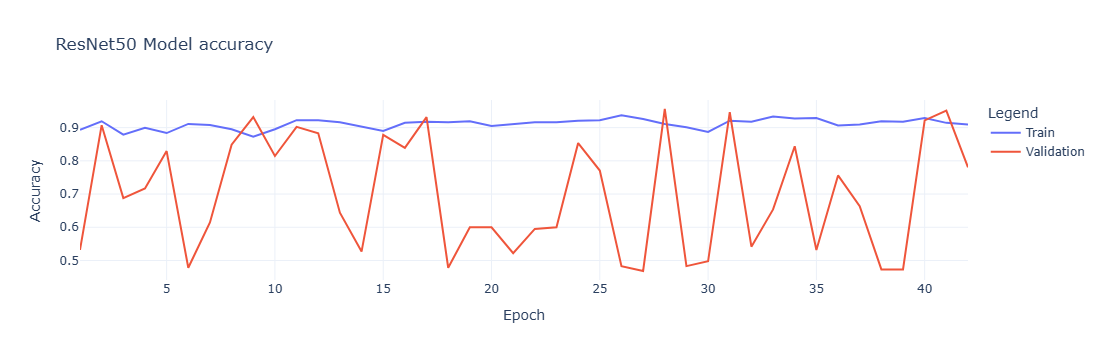

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step
[[68 28]
 [74 35]]


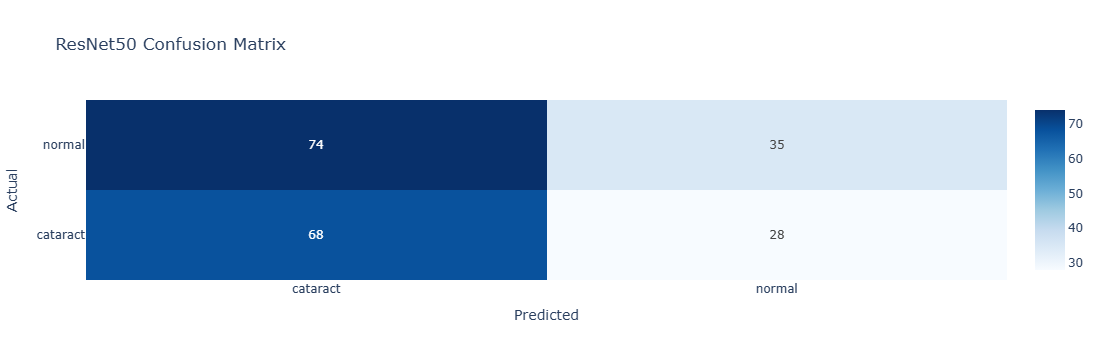

In [34]:

# Evaluate the model
loss_resnet50, accuracy_resnet50 = model_resnet50.evaluate(validation_generator)
print(f"ResNet50 Valid Accuracy = {accuracy_resnet50}")
print(f"ResNet50 Valid Loss = {loss_resnet50}")

# Plotting model accuracy for ResNet50
accuracy_resnet50 = history_resnet50.history['accuracy']
val_accuracy_resnet50 = history_resnet50.history['val_accuracy']
epochs_resnet50 = list(range(1, len(accuracy_resnet50) + 1))
fig_resnet50 = go.Figure()
fig_resnet50.add_trace(go.Scatter(x=epochs_resnet50, y=accuracy_resnet50, mode='lines', name='Train'))
fig_resnet50.add_trace(go.Scatter(x=epochs_resnet50, y=val_accuracy_resnet50, mode='lines', name='Validation'))
fig_resnet50.update_layout(
    title='ResNet50 Model accuracy',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    legend_title='Legend',
    template='plotly_white'
)

fig_resnet50.show()

# Predict on validation data using ResNet50
predictions_resnet50 = model_resnet50.predict(validation_generator)
predicted_class_indices_resnet50 = np.argmax(predictions_resnet50, axis=1)
# Confusion matrix for ResNet50
cm_resnet50 = confusion_matrix(true_class_indices, predicted_class_indices_resnet50)
print(cm_resnet50)

# Create a heatmap for ResNet50
fig_cm_resnet50 = go.Figure(data=go.Heatmap(
    z=cm_resnet50,
    x=class_labels,
    y=class_labels,
    colorscale='Blues',
    text=cm_resnet50,
    texttemplate="%{text}",
    hoverinfo="text"
))

# Update layout
fig_cm_resnet50.update_layout(
    title='ResNet50 Confusion Matrix',
    xaxis_title='Predicted',
    yaxis_title='Actual'
)
fig_cm_resnet50.show()

In [35]:
# Classification report
report = classification_report(true_class_indices, predicted_class_indices_resnet50, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

    cataract       0.48      0.71      0.57        96
      normal       0.56      0.32      0.41       109

    accuracy                           0.50       205
   macro avg       0.52      0.51      0.49       205
weighted avg       0.52      0.50      0.48       205

